In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from datetime import datetime


In [2]:
# Configure logging
logging.basicConfig(filename='customer_behavior_analysis.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Libraries imported and logging initialized.')

In [3]:
# Load the dataset (Replace with actual paths)
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')
logging.info('Datasets loaded successfully.')

C:\Users\Hello\AppData\Local\Temp\ipykernel_12608\2600757995.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


In [4]:
# Merge train/test data with store information
train = pd.merge(train, store, how='left', on='Store')
test = pd.merge(test, store, how='left', on='Store')
logging.info('Merged train and store data.')

In [5]:
# Data Overview
logging.info('Checking for missing values...')
print(train.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [6]:
# Handling missing data
# Fill missing values for 'CompetitionDistance' with median as it is a continuous variable
train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
test['CompetitionDistance'].fillna(test['CompetitionDistance'].median(), inplace=True)

C:\Users\Hello\AppData\Local\Temp\ipykernel_12608\2410233613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
C:\Users\Hello\AppData\Local\Temp\ipykernel_12608\2410233613.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [7]:
# For PromoInterval, fill with 'None' indicating no promotion interval
train['PromoInterval'].fillna('None', inplace=True)
test['PromoInterval'].fillna('None', inplace=True)

logging.info('Missing values handled.')

C:\Users\Hello\AppData\Local\Temp\ipykernel_12608\2852976015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['PromoInterval'].fillna('None', inplace=True)
C:\Users\Hello\AppData\Local\Temp\ipykernel_12608\2852976015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [8]:
# Convert 'Date' column to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [9]:
# Feature Engineering
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
train['DayOfWeek'] = train['Date'].dt.dayofweek

In [10]:
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['DayOfWeek'] = test['Date'].dt.dayofweek

In [11]:
logging.info('Feature engineering: Month, Year, DayOfWeek added.')

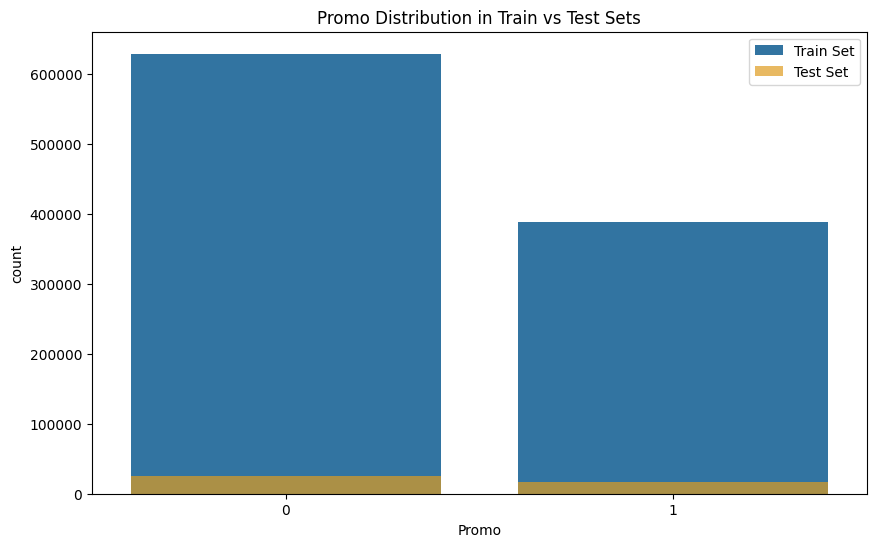

In [12]:
# Exploratory Data Analysis

# 1. Distribution of promotions in train and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train, label='Train Set')
sns.countplot(x='Promo', data=test, label='Test Set', color='orange', alpha=0.7)
plt.title('Promo Distribution in Train vs Test Sets')
plt.legend()
plt.show()
logging.info('Promo distribution compared between train and test sets.')

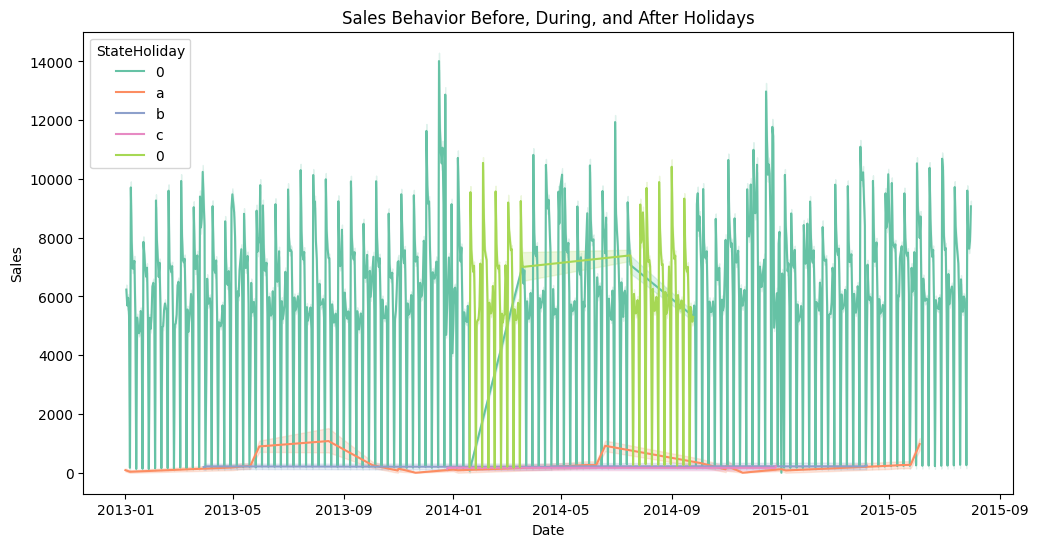

In [13]:
# 2. Sales Behavior before, during, and after holidays
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=train, palette='Set2')
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()
logging.info('Sales behavior analyzed around holidays.')

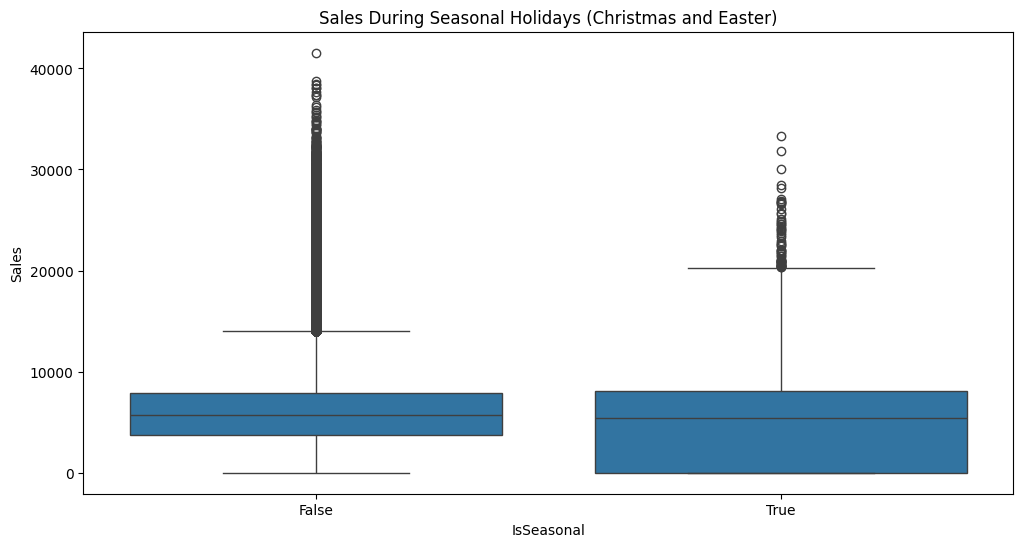

In [14]:
# 3. Seasonal Purchase Behavior (Christmas, Easter)
seasonal_holidays = ['12-24', '12-25', '04-01', '04-02'] # Christmas and Easter days (example)
train['IsSeasonal'] = train['Date'].dt.strftime('%m-%d').isin(seasonal_holidays)

plt.figure(figsize=(12, 6))
sns.boxplot(x='IsSeasonal', y='Sales', data=train)
plt.title('Sales During Seasonal Holidays (Christmas and Easter)')
plt.show()
logging.info('Seasonal behavior around Christmas and Easter analyzed.')

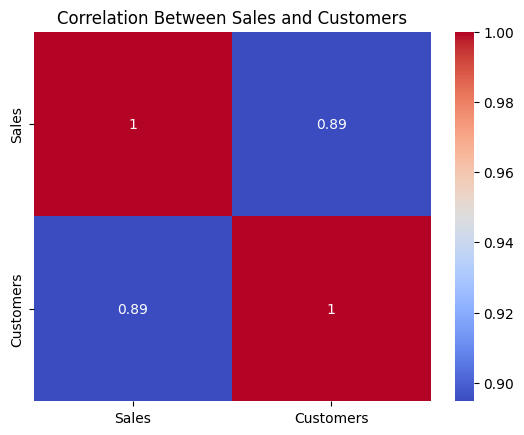

In [15]:
# 4. Correlation between Sales and Number of Customers
corr = train[['Sales', 'Customers']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Customers')
plt.show()
logging.info('Correlation between sales and customers calculated and plotted.')

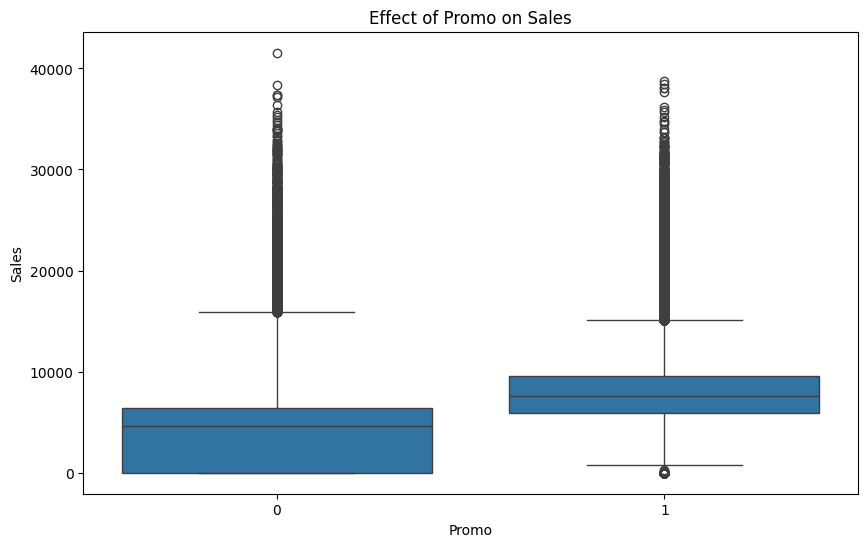

In [16]:
# 5. Promo Effect on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title('Effect of Promo on Sales')
plt.show()
logging.info('Promo effect on sales visualized.')

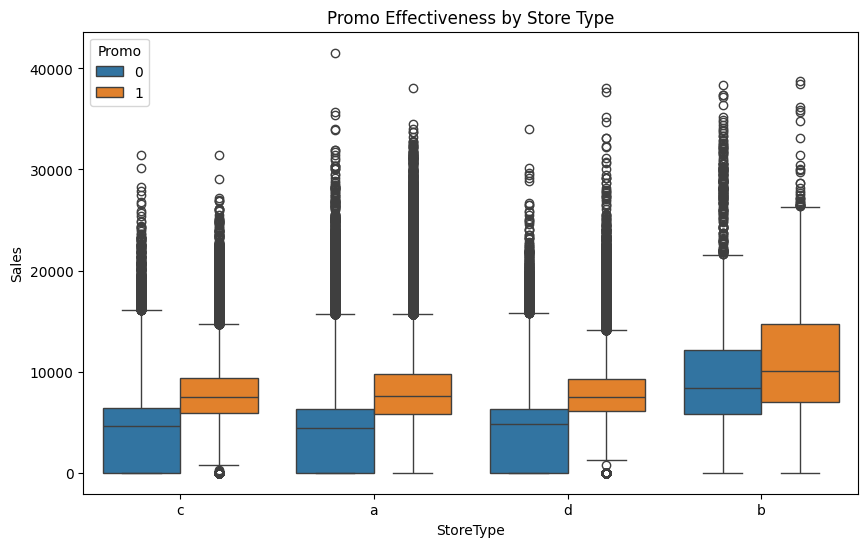

In [17]:
# 6. Promo Effectiveness by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', hue='Promo', data=train)
plt.title('Promo Effectiveness by Store Type')
plt.show()
logging.info('Promo effectiveness analyzed by store type.')

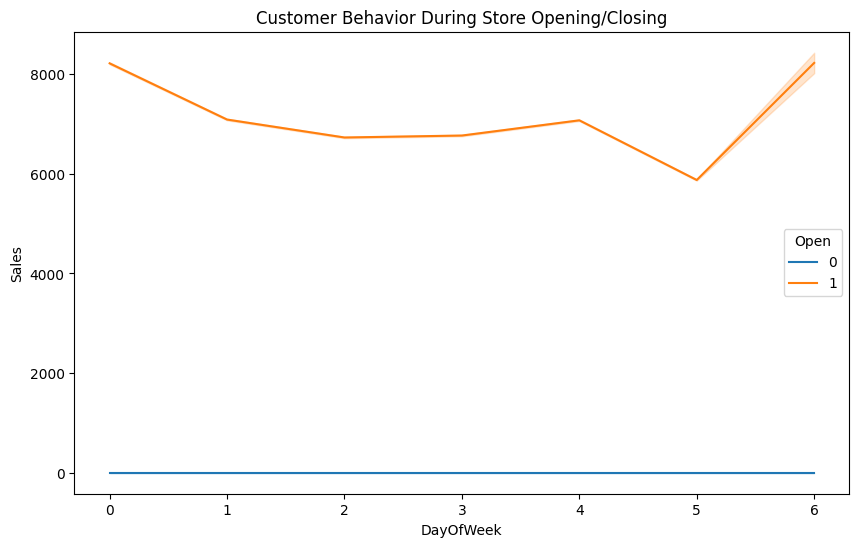

In [18]:
# 7. Store Opening/Closing Times Effect on Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='Sales', hue='Open', data=train)
plt.title('Customer Behavior During Store Opening/Closing')
plt.show()
logging.info('Customer behavior during store opening/closing times visualized.')


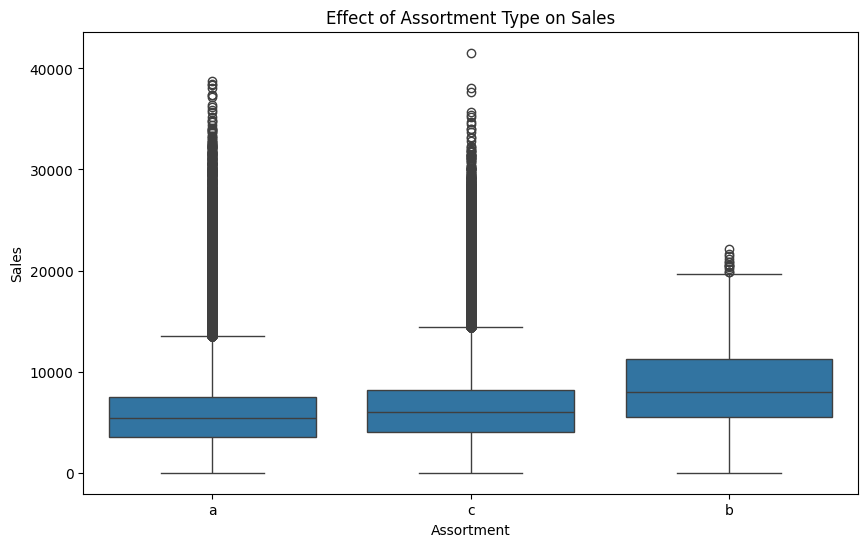

In [19]:
# 8. Assortment Type Effect on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=train)
plt.title('Effect of Assortment Type on Sales')
plt.show()
logging.info('Assortment type effect on sales analyzed.')

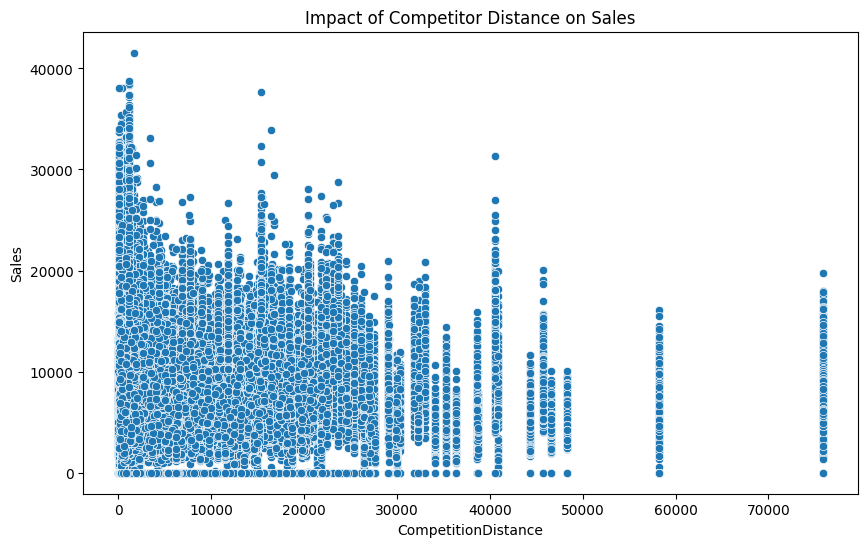

In [20]:
# 9. Competitor Distance Impact on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train)
plt.title('Impact of Competitor Distance on Sales')
plt.show()
logging.info('Competitor distance impact on sales visualized.')

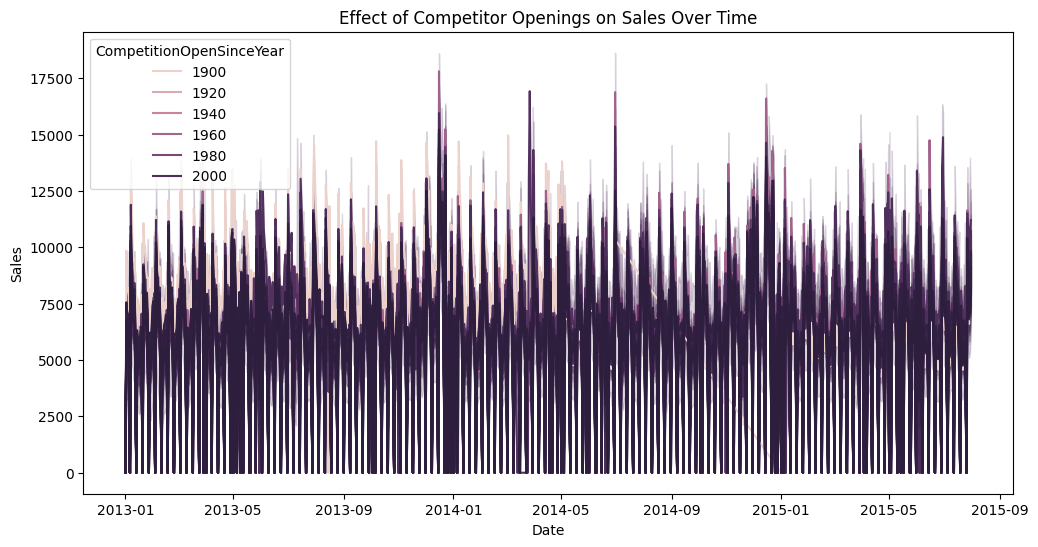

In [23]:
# 10. Effect of Competitor Openings on Sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='CompetitionOpenSinceYear', data=train)
plt.title('Effect of Competitor Openings on Sales Over Time')
plt.show()
logging.info('Competitor opening impact on sales analyzed.')

# Summary Insights
logging.info('Exploratory analysis completed. Key insights summarized.')